<h2 id="exercises">Explore Exercises</h2>
<p>Do your work for this exercise in a file named <code>explore</code>.</p>


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [11]:
import prepare_spam

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

1. Spam Data

<li>Load the spam data set.</li>


In [57]:
spam_df = pd.read_csv('spam_clean.csv')
spam_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
spam_df.rename(columns={'text': 'original'}, inplace=True)


In [59]:
spam_df.head()

,label,original
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
spam_df = prepare_spam.prep_article_data(spam_df, 'original', extra_words = ['u', '2', 'ur', "'", '4'])

In [61]:
spam_df.head()

,label,original,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,dun say earli hor c alreadi say,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


<li>Create and explore bigrams for the spam data. Visualize them with a word
   cloud. How do they compare with the ham bigrams?</li>


In [62]:
df=spam_df.copy()

In [63]:
# Split out word lists

# combine all messages in single string by label

original_ham_words =(' '.join(df[df.label == 'ham'].original))
original_spam_words =(' '.join(df[df.label == 'spam'].original))
original_all_words = (' '.join(df.original))

In [64]:
clean_ham_words =(' '.join(df[df.label == 'ham'].clean))
clean_spam_words =(' '.join(df[df.label == 'spam'].clean))
clean_all_words = (' '.join(df.clean))

In [65]:
lemmatized_ham_words =(' '.join(df[df.label == 'ham'].lemmatized))
lemmatized_spam_words =(' '.join(df[df.label == 'spam'].lemmatized))
lemmatized_all_words = (' '.join(df.lemmatized))

In [66]:
clean_ham_freq = pd.Series(clean_ham_words.split()).value_counts()
clean_spam_freq = pd.Series(clean_spam_words.split()).value_counts()
clean_all_freq = pd.Series(clean_all_words.split()).value_counts()

In [67]:
lemmatized_ham_freq = pd.Series(lemmatized_ham_words.split()).value_counts()
lemmatized_spam_freq = pd.Series(lemmatized_spam_words.split()).value_counts()
lemmatized_all_freq = pd.Series(lemmatized_all_words.split()).value_counts()

In [68]:
clean_ham_freq.head(20)

get      303
ltgt     276
ok       272
go       247
know     232
got      231
like     229
call     229
come     224
good     222
day      198
time     189
love     186
going    167
one      163
want     163
home     160
lor      160
need     156
sorry    153
dtype: int64

In [69]:
lemmatized_ham_freq.head(20)

get      314
ltgt     276
go       273
ok       272
come     242
know     241
call     241
like     232
got      231
day      225
wa       225
good     223
time     213
love     194
want     183
need     171
one      170
going    167
home     160
lor      160
dtype: int64

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

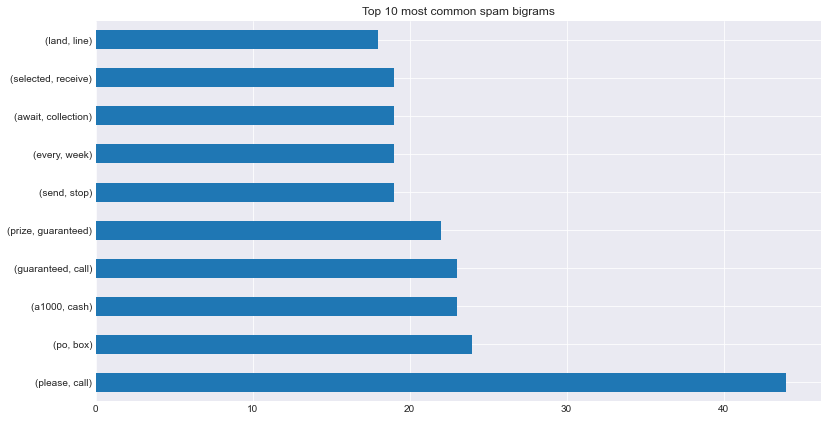

In [70]:
pd.Series(nltk.bigrams(clean_spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams - Cleaned text')

Text(0.5, 1.0, 'Top 10 most common ham bigrams - Cleaned text')

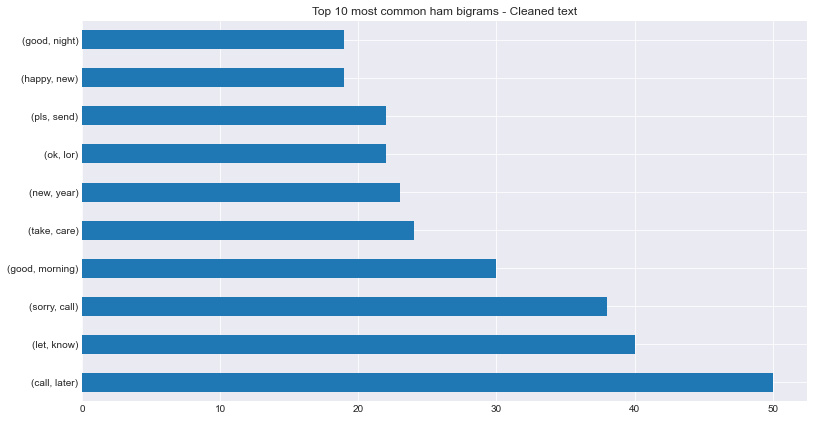

In [72]:
pd.Series(nltk.bigrams(clean_ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams - Cleaned text')

Text(0.5, 1.0, 'Top 10 most common spam bigrams - Lemmatized  text')

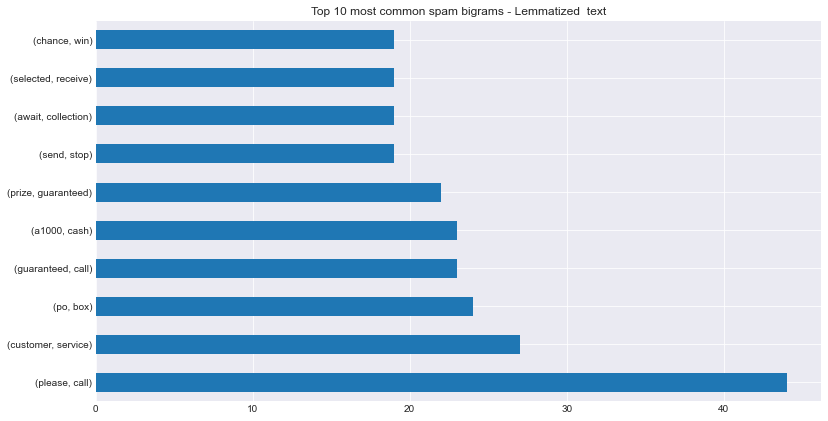

In [71]:
pd.Series(nltk.bigrams(lemmatized_spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams - Lemmatized  text')

Text(0.5, 1.0, 'Top 10 most common ham bigrams - Lemmatized  text')

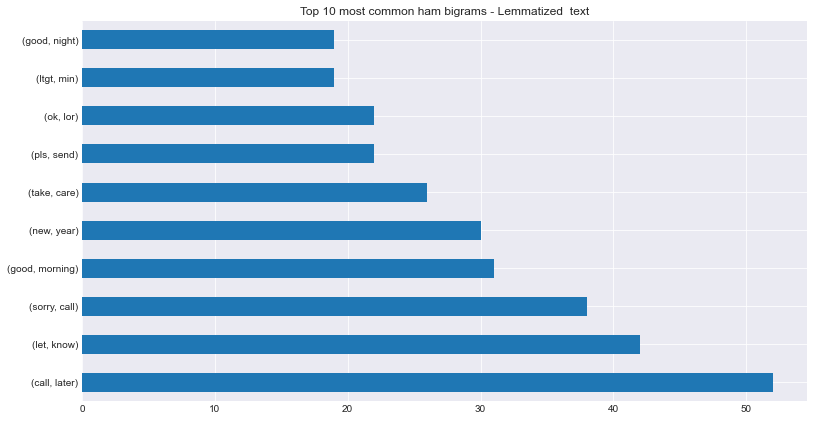

In [73]:
pd.Series(nltk.bigrams(lemmatized_ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams - Lemmatized  text')

In [74]:
from wordcloud import WordCloud


Text(0.5, 1.0, 'Word Cloud Spam')

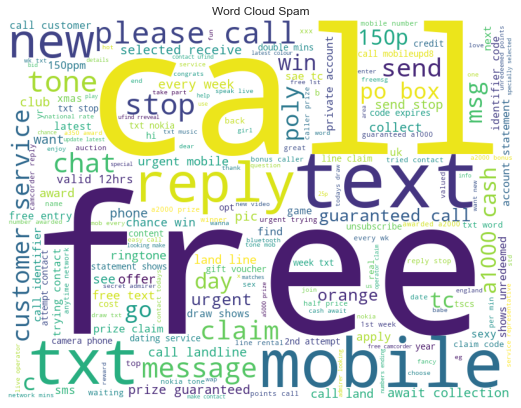

In [77]:
spam_img = WordCloud(background_color='white', width=800, height=600).generate(clean_spam_words)
plt.imshow(spam_img)
plt.axis('off')
plt.title('Word Cloud Spam')

Text(0.5, 1.0, 'Word Cloud Spam')

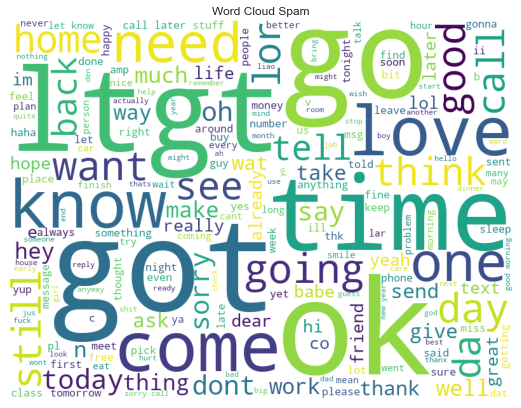

In [79]:
ham_img = WordCloud(background_color='white', width=800, height=600).generate(clean_ham_words)
plt.imshow(ham_img)
plt.axis('off')
plt.title('Word Cloud Spam')

<li>Is there any overlap in the bigrams for the spam data and the ham data?</li>


<li>Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
   the spam and ham data.</li>


2. Explore the blog articles using the techniques discussed in the exploration
   lesson.


   
3. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the <code>category</code> variable when exploring.</p>
</li>
</ol>
